In [1]:
# Importing Libraries
import pandas as pd
from pandas import Timestamp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from fancyimpute import KNN 
import os
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.gridspec as gridspec 
%matplotlib inline
from ggplot import *

C:\Users\Saurav Bhardwaj\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Saurav Bhardwaj\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\Saurav Bhardwaj\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\Saurav Bhardwaj\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a futu

In [2]:
#set working directory
os.chdir("S:/analytics/Projects/Employee Absenteeism python")

In [3]:
os.getcwd()

'S:\\analytics\\Projects\\Employee Absenteeism python'

In [4]:
#loading the data 
data = pd.read_excel("Absenteeism_at_work_Project.xls")

In [5]:
data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [10]:
data.dtypes

ID                                   int64
Reason for absence                  object
Month of absence                    object
Day of the week                     object
Seasons                             object
Transportation expense             float64
Distance from Residence to Work    float64
Service time                        object
Age                                float64
Work load Average/day              float64
Hit target                          object
Disciplinary failure                object
Education                           object
Son                                 object
Social drinker                      object
Social smoker                       object
Pet                                 object
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [8]:
data.shape

(740, 21)

# data pre processing

In [9]:
#Exploratory Data Analysis
data['Reason for absence']=data['Reason for absence'].astype(object)
data['Month of absence']=data['Month of absence'].astype(object)
data['Day of the week']=data['Day of the week'].astype(object)
data['Seasons']=data['Seasons'].astype(object)
data['Service time']=data['Service time'].astype(object)
data['Hit target']=data['Hit target'].astype(object)
data['Disciplinary failure']=data['Disciplinary failure'].astype(object)
data['Education']=data['Education'].astype(object)
data['Son']=data['Son'].astype(object)
data['Social drinker']=data['Social drinker'].astype(object)
data['Social smoker']=data['Social smoker'].astype(object)
data['Pet']=data['Pet'].astype(object)

In [16]:
#finding the number of missing values
data.isnull().sum().sum()

135

In [17]:
# Categorising into continuous and categorical
continuous_vars = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

categorical_vars = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

# missing value analysis

In [19]:
#Creating dataframe with missing values present in each variable
missing_val = pd.DataFrame(data.isnull().sum()).reset_index()

In [20]:
missing_val

,index,0
0,ID,0
1,Reason for absence,3
2,Month of absence,1
3,Day of the week,0
4,Seasons,0
5,Transportation expense,7
6,Distance from Residence to Work,3
7,Service time,3
8,Age,3
9,Work load Average/day,10


In [21]:
#Renaming variables of missing_val dataframe
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

In [22]:
#Calculating percentage missing value
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(data))*100

In [25]:
missing_val

,Variables,Missing_percentage
0,Body mass index,4.189189
1,Absenteeism time in hours,2.972973
2,Height,1.891892
3,Work load Average/day,1.351351
4,Education,1.351351
5,Transportation expense,0.945946
6,Son,0.810811
7,Disciplinary failure,0.810811
8,Hit target,0.810811
9,Social smoker,0.540541


In [24]:
# Sorting missing_val in Descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

# Imputing missing values

In [26]:
data['Body mass index'].iloc[12]

23.0

In [27]:
#creating missing value
data['Body mass index'].iloc[12] = np.nan

C:\Users\Saurav Bhardwaj\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [28]:
data['Body mass index'].iloc[12]

nan

In [29]:
# Checking for "Body mass index" column
# Actual value = 23
# Mean = 26.68
# Median = 25
# KNN = 23.20

In [30]:
# Imputing with mean
#data['Body mass index'] = data['Body mass index'].fillna(data['Body mass index'].mean())
# data['Body mass index'].iloc[12]

# Imputing with median
#data['Body mass index'] = data['Body mass index'].fillna(data['Body mass index'].median())
# data['Body mass index'].iloc[12]

In [31]:
#Apply KNN imputation algorithm
data = pd.DataFrame(KNN(k = 5).complete(data), columns = data.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.322
Imputing row 101/740 with 1 missing, elapsed time: 6.355
Imputing row 201/740 with 0 missing, elapsed time: 6.371
Imputing row 301/740 with 0 missing, elapsed time: 6.371
Imputing row 401/740 with 0 missing, elapsed time: 6.371
Imputing row 501/740 with 0 missing, elapsed time: 6.371
Imputing row 601/740 with 0 missing, elapsed time: 6.371
Imputing row 701/740 with 0 missing, elapsed time: 6.371


In [32]:
data['Body mass index'].iloc[12]

23.20431847593071

In [33]:
#confirming for missing values
data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

# outlier analysis

Text(0,0.5,'Values')

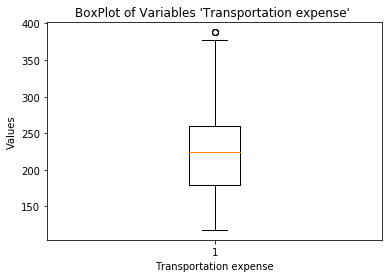

In [41]:
# Ploting BoxPlot of continuous variables
plt.boxplot([data['Transportation expense']])
plt.xlabel('Transportation expense')
plt.title("BoxPlot of Variables 'Transportation expense' ")
plt.ylabel('Values')

Text(0,0.5,'Values')

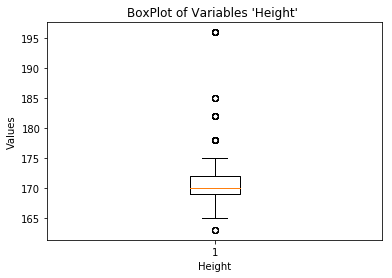

In [40]:
# Ploting BoxPlot of continuous variables
plt.boxplot(data['Height'])
plt.xlabel('Height')
plt.title("BoxPlot of Variables 'Height' ")
plt.ylabel('Values')

Text(0,0.5,'Values')

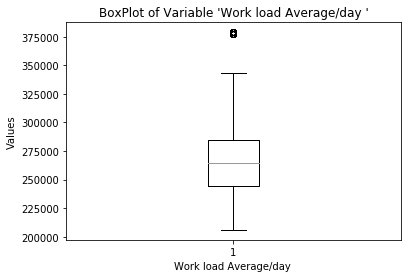

In [42]:
plt.boxplot(data['Work load Average/day '])
plt.xlabel("Work load Average/day ")
plt.title("BoxPlot of Variable 'Work load Average/day '")
plt.ylabel('Values')

Text(0,0.5,'Values')

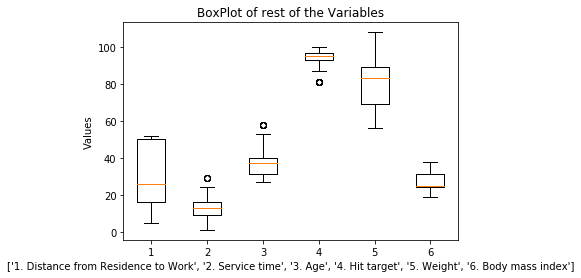

In [43]:
plt.boxplot([ data['Distance from Residence to Work'], data['Service time'], data['Age'], data['Hit target'], data['Weight'], data['Body mass index']])
plt.xlabel(['1. Distance from Residence to Work', '2. Service time', '3. Age', '4. Hit target', '5. Weight', '6. Body mass index'])
plt.title("BoxPlot of rest of the Variables")
plt.ylabel('Values')

In [44]:
# From the above boxplot we can clearly see that in variables 'Distance from Residence to Work', 'Weight' and 'Body mass index'
# there is no outlier

In [45]:
# list of variables which doesn't have outlier
neglect = ['Distance from Residence to Work', 'Weight', 'Body mass index']

In [50]:
#detect and replace outliers with NAs
for i in continuous_vars:
    #getting 75 & 25percentile of variable 'i'
    q75, q25 = np.percentile(data[i], [75,25])
    #calculating inter quartile range
    iqr = q75 - q25
    
    #calculating upper fence and lower fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    

In [52]:
maximum

17.0

In [55]:
# Replacing all the outliers value to NA
data.loc[data[i]< minimum,i] = np.nan
data.loc[data[i]> maximum,i] = np.nan

In [57]:
#checking for NAs
data.isnull().sum().sum()

46

In [58]:
# Imputing missing values with KNN
data = pd.DataFrame(KNN(k = 5).complete(data), columns = data.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.185
Imputing row 101/740 with 0 missing, elapsed time: 0.185
Imputing row 201/740 with 0 missing, elapsed time: 0.185
Imputing row 301/740 with 0 missing, elapsed time: 0.185
Imputing row 401/740 with 0 missing, elapsed time: 0.189
Imputing row 501/740 with 0 missing, elapsed time: 0.189
Imputing row 601/740 with 0 missing, elapsed time: 0.189
Imputing row 701/740 with 0 missing, elapsed time: 0.189


In [59]:
#checking for nas after knn imputation
data.isnull().sum().sum()

0

# Feature selection

In [60]:
from scipy.stats import chi2_contingency
import seaborn as sns

In [61]:
#correlation analysis for continuous_vars
#correlation plot
df_corr = data.loc[:, continuous_vars]

In [62]:
df_corr.shape

(740, 10)

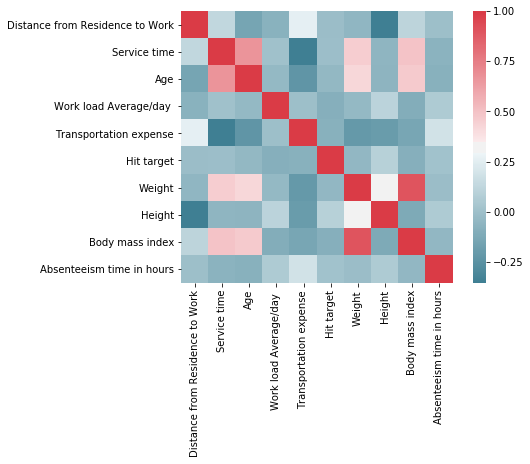

In [75]:
#set the width and height of correlation plot
f, ax = plt.subplots(figsize=(7,5))

#generate correlation matrix
corr = df_corr.corr()

#plot with seaborn library
sns.heatmap(corr, mask = np.zeros_like(corr, dtype=np.bool), cmap = sns.diverging_palette(220, 10, as_cmap = True),
           square = True, ax=ax)
plt.savefig('correlation.png')

In [77]:
#Chisquare test of independence
#Save categorical variables
catorical_vars = ["Reason for absence", "Month of absence", "Day of the week", "Seasons", "Service time", "Disciplinary failure", "Education", "Son", "Social drinker","Social smoker","Pet"]

In [78]:
continuous_vars , categorical_vars

(['Distance from Residence to Work',
  'Service time',
  'Age',
  'Work load Average/day ',
  'Transportation expense',
  'Hit target',
  'Height',
  'Body mass index',
  'Absenteeism time in hours'],
 ['ID',
  'Reason for absence',
  'Month of absence',
  'Day of the week',
  'Seasons',
  'Disciplinary failure',
  'Education',
  'Social drinker',
  'Social smoker',
  'Pet',
  'Son'])

In [81]:
#loop for chi square values
for i in categorical_vars:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(data['Absenteeism time in hours'], data[i]))
    print(p)

ID
0.1633938714087867
Reason for absence
2.6448002520325107e-97
Month of absence
0.2663091935688767
Day of the week
0.5365563165637227
Seasons
0.002401744825047674
Disciplinary failure
2.111715200697366e-173
Education
1.0
Social drinker
2.7445438698660395e-53
Social smoker
0.08499098377005693
Pet
0.9999999999999939
Son
1.1924794594318792e-48


In [87]:
#as we can see weight and body mass index are highly correlated with each other
# Droping the variables which has redundant information
to_drop = ['Weight']
data = data.drop(to_drop, axis = 1)
data = data.drop([ 'ID', 'Education', 'Social smoker', 'Pet'], axis=1)

ValueError: labels ['ID' 'Education' 'Social smoker' 'Pet'] not contained in axis

In [90]:
# Updating the Continuous Variables and Categorical Variables after droping some variables
continuous_vars = [i for i in continuous_vars if i not in to_drop]
categorical_vars = [i for i in categorical_vars if i not in to_drop]

In [88]:
clean_data = data.copy()

# Feature scaling

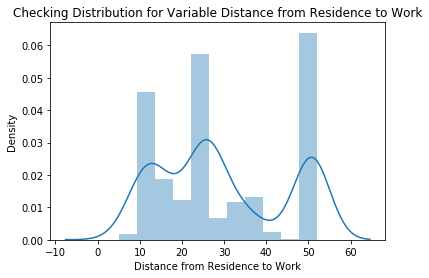

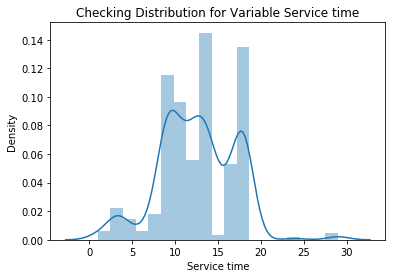

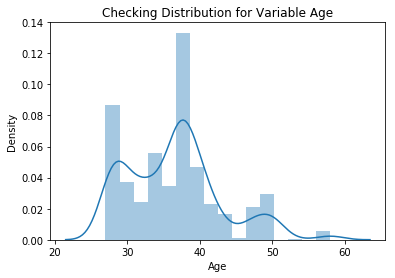

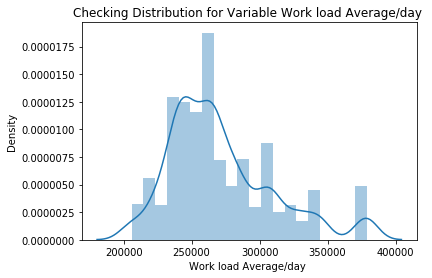

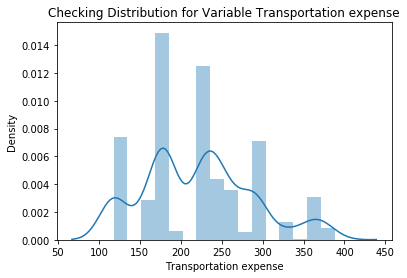

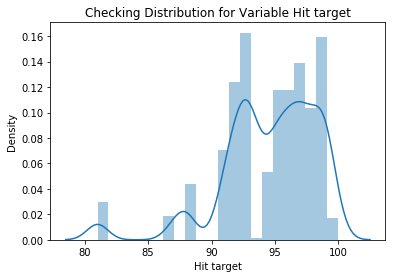

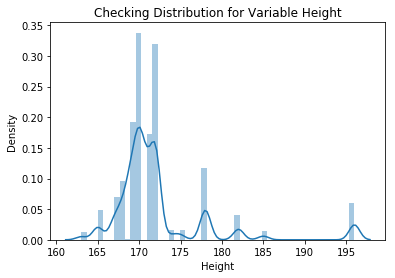

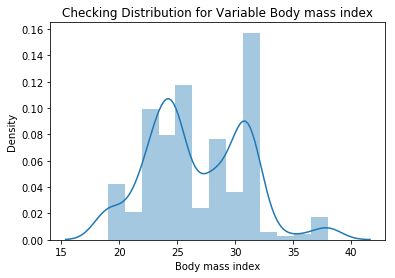

In [98]:
##normality check
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(data[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [108]:
#as we can see data is not normally distributed , we will go for normalization 
for i in continuous_vars:
    print(i)
    data[i] = (data[i] - data[i].min())/(data[i].max()-data[i].min())

Distance from Residence to Work
Service time
Age
Work load Average/day 
Transportation expense
Hit target
Height
Body mass index
Absenteeism time in hours


In [109]:
data

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Social drinker,Height,Body mass index,Absenteeism time in hours
0,26.0,7.0,3.0,1.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,2.0,1.0,0.272727,0.578947,0.239173
1,0.0,7.0,3.0,1.0,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,1.0,1.0,0.454545,0.631579,0.000000
2,23.0,7.0,4.0,1.0,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.0,1.0,0.212121,0.631579,0.119586
3,7.0,7.0,5.0,1.0,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,2.0,1.0,0.151515,0.263158,0.239173
4,23.0,7.0,5.0,1.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,2.0,1.0,0.272727,0.578947,0.119586
5,23.0,7.0,6.0,1.0,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.0,1.0,0.212121,0.631579,0.119587
6,22.0,7.0,6.0,1.0,0.832766,1.000000,0.071429,0.032258,0.194471,0.842105,0.0,1.0,1.0,0.272727,0.421053,0.478345
7,23.0,7.0,6.0,1.0,0.525926,0.957447,0.357143,0.290323,0.194471,0.842105,0.0,4.0,1.0,0.151515,0.210526,0.239173
8,19.0,7.0,2.0,1.0,0.137037,0.148936,0.464286,0.225806,0.194471,0.842105,0.0,2.0,1.0,1.000000,0.315789,0.189540
9,22.0,7.0,2.0,1.0,0.433333,0.127660,0.464286,0.322581,0.194471,0.842105,0.0,1.0,0.0,0.272727,0.526316,0.478345


# data sampling

In [113]:
from sklearn.cross_validation import train_test_split
#Divide data into train and test
train, test = train_test_split(data, test_size=0.20, random_state=42)

# machine learning models

In [115]:
from sklearn.tree import DecisionTreeRegressor
#Decision tree for regression
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:9], train.iloc[:,9])

In [116]:
fit_DT

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [117]:
#checking for any missing valuses that has leeked in
np.where(data.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [118]:
np.isnan(data.values.any())

False

In [119]:
test = test.fillna(train.mean())

In [120]:
#Decision tree for regression
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:15], train.iloc[:,15])

In [121]:
data.shape

(740, 16)

In [122]:
#Apply model on test data
predictions_DT = fit_DT.predict(test.iloc[:,0:15])

In [123]:
predictions_DT

array([0.18116806, 0.18116806, 0.38677857, 0.18116806, 0.18116806,
       0.38491953, 0.18116806, 0.38677857, 0.18116806, 0.18116806,
       0.06582971, 0.06582971, 0.38677857, 0.38677857, 0.06582971,
       0.38677857, 0.18116806, 0.18116806, 0.18116806, 0.18116806,
       0.38677857, 0.18116806, 0.18116806, 0.06582971, 0.18116806,
       0.38491953, 0.38677857, 0.38677857, 0.18116806, 0.38677857,
       0.18116806, 0.38677857, 0.38677857, 0.18116806, 0.38491953,
       0.18116806, 0.38677857, 0.18116806, 0.18116806, 0.38677857,
       0.38677857, 0.38677857, 0.38677857, 0.18116806, 0.18116806,
       0.18116806, 0.38677857, 0.38677857, 0.18116806, 0.18116806,
       0.18116806, 0.38677857, 0.38677857, 0.18116806, 0.18116806,
       0.06582971, 0.18116806, 0.06582971, 0.38677857, 0.18116806,
       0.38677857, 0.18116806, 0.18116806, 0.38677857, 0.38677857,
       0.38677857, 0.18116806, 0.18116806, 0.18116806, 0.38677857,
       0.18116806, 0.18116806, 0.18116806, 0.18116806, 0.38677

In [124]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [125]:
rmse(test.iloc[:,15], predictions_DT)

0.16972039562573937

In [126]:
#rmse using DT = 0.16972039562573937

In [127]:
#Divide data into train and test
X = data.values[:, 0:15]
Y = data.values[:,15]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [128]:
X_test.shape

(148, 15)

In [133]:
from sklearn.ensemble import RandomForestRegressor

In [134]:
# Building model on top of training dataset
fit_RF = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)


In [135]:
fit_RF

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [146]:
# Calculating RMSE for training data to check for over fitting
RF_predictions_train = fit_RF.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,RF_predictions_train))

In [145]:
# Calculating RMSE for test data to check accuracy
RF_predictions_test = fit_RF.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,RF_predictions_test))

In [143]:
rmse_for_train

0.0641682713983159

In [139]:
rmse_for_test

0.18017389276028373

In [140]:
print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))

Root Mean Squared Error For Training data = 0.0641682713983159
Root Mean Squared Error For Test data = 0.18017389276028373


# Linear regression

In [147]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

# Calculating RMSE for training data to check for over fitting
LR_pred_train = fit_LR.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,LR_pred_train))

# Calculating RMSE for test data to check accuracy
LR_pred_test = fit_LR.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,LR_pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))

Root Mean Squared Error For Training data = 0.17189637356023962
Root Mean Squared Error For Test data = 0.20422938819536107


# data visualization

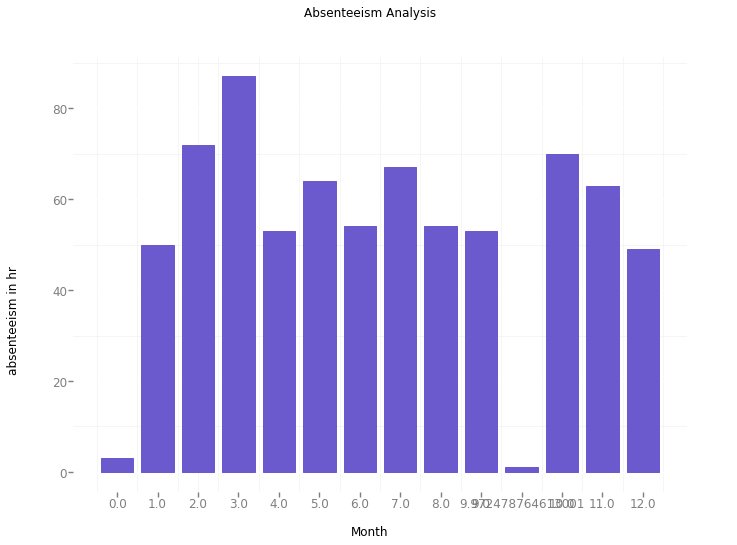

<ggplot: (-9223371912058559386)>

In [148]:
#Visualising Important components

ggplot(clean_data, aes(x='Month of absence', y='Absenteeism time in hours')) +\
    geom_bar(fill= "SlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Month") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()


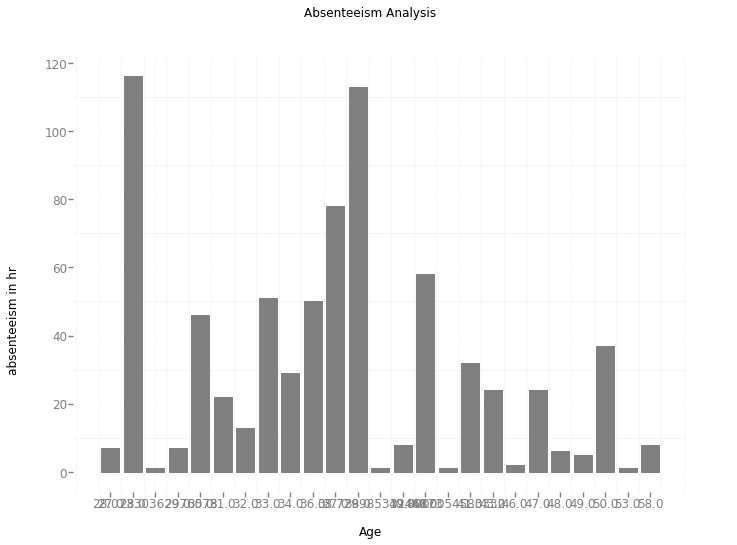

<ggplot: (-9223371912059848062)>

In [152]:
ggplot(clean_data, aes(x='Age', y='Absenteeism time in hours')) +\
    geom_bar(fill= "Gray") +\
    scale_color_brewer(type='diverging', palette=5) +\
    xlab("Age") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

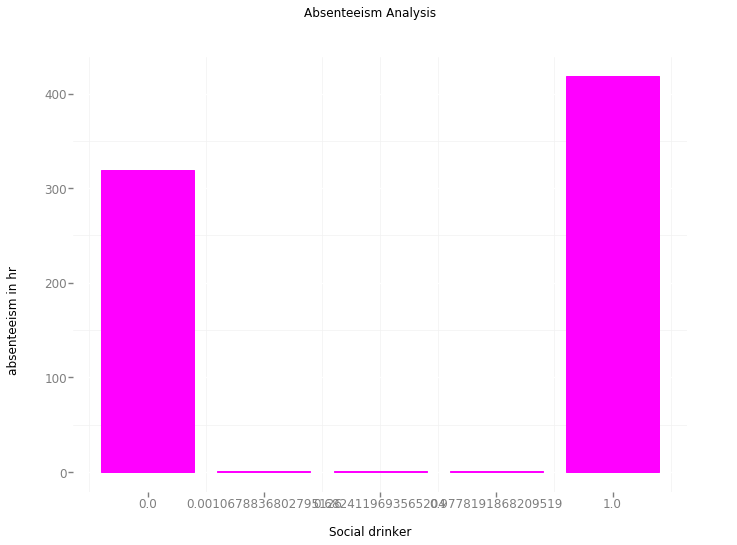

<ggplot: (-9223371912059952496)>

In [153]:
ggplot(clean_data, aes(x='Social drinker', y='Absenteeism time in hours')) +\
    geom_bar(fill= "Magenta") +\
    scale_color_brewer(type='diverging', palette=5) +\
    xlab("Social drinker") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

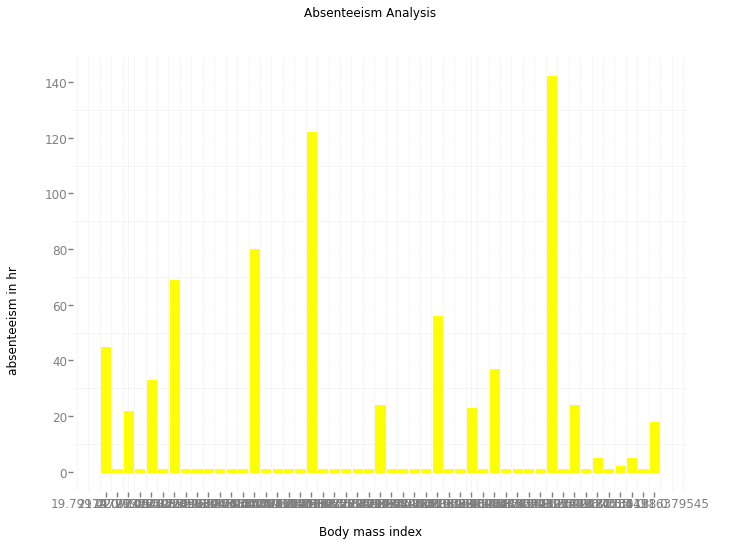

<ggplot: (-9223371912059870064)>

In [154]:
ggplot(clean_data, aes(x='Body mass index', y='Absenteeism time in hours')) +\
    geom_bar(fill= "Yellow") +\
    scale_color_brewer(type='diverging', palette=5) +\
    xlab("Body mass index") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

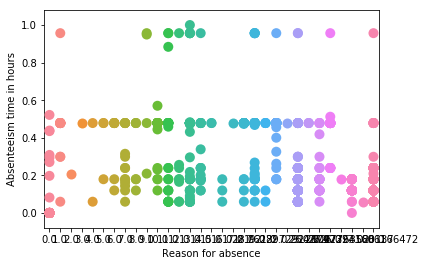

In [175]:
sns.stripplot(x="Reason for absence", y="Absenteeism time in hours", data=data,size = 10);
plt.savefig('Reason for absence.png')

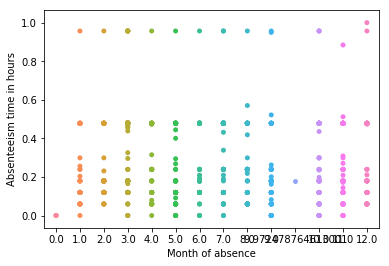

In [158]:
sns.stripplot(x="Month of absence", y="Absenteeism time in hours", data=data, size = 5);
plt.savefig('Month of absence.png')

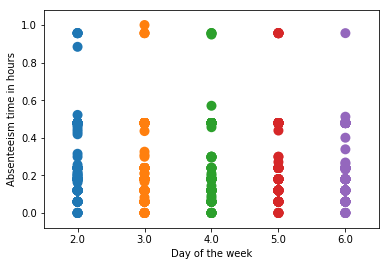

In [160]:
sns.stripplot(x="Day of the week", y="Absenteeism time in hours", data=data, size = 10);
plt.savefig('Day of the week.png')

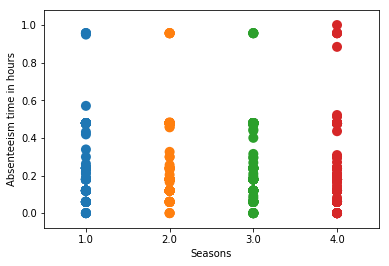

In [161]:
sns.stripplot(x="Seasons", y="Absenteeism time in hours", data=data, size = 10);
plt.savefig('Seasons.png')

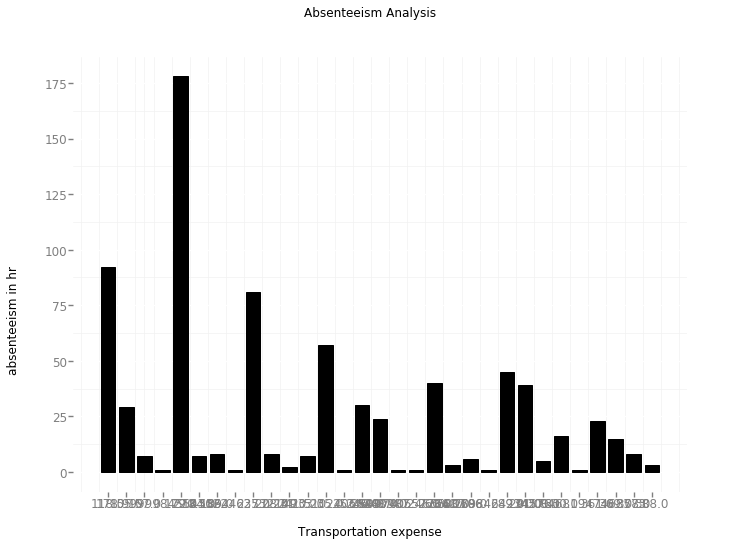

<ggplot: (-9223371912056804436)>

In [165]:
ggplot(clean_data, aes(x='Transportation expense', y='Absenteeism time in hours')) +\
    geom_bar(fill= "Black") +\
    scale_color_brewer(type='diverging', palette=5) +\
    xlab("Transportation expense") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

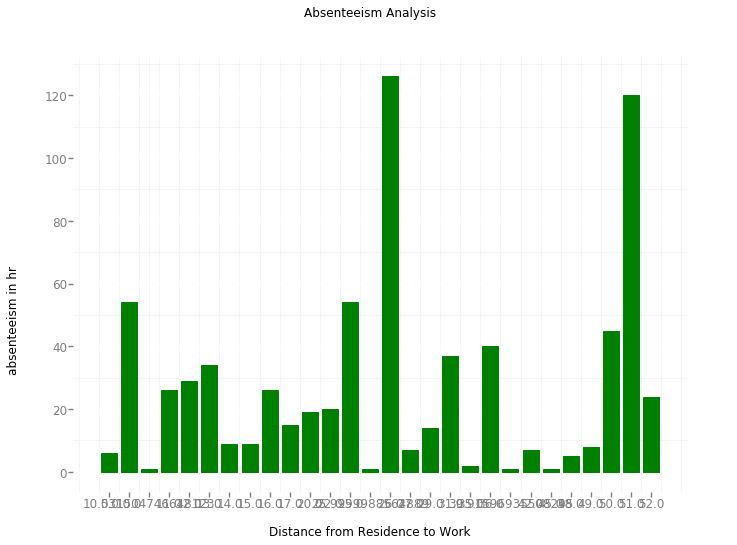

<ggplot: (-9223371912056517288)>

In [172]:
ggplot(clean_data, aes(x='Distance from Residence to Work', y='Absenteeism time in hours')) +\
    geom_bar(fill= "Green") +\
    scale_color_brewer(type='diverging', palette=5) +\
    xlab("Distance from Residence to Work") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

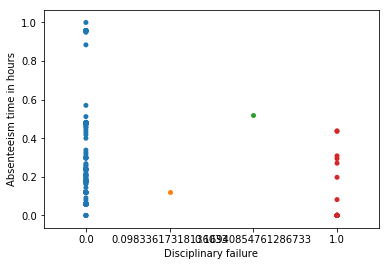

In [168]:
sns.stripplot(x="Disciplinary failure", y="Absenteeism time in hours", data=data);
plt.savefig('Disciplinary failure.png')

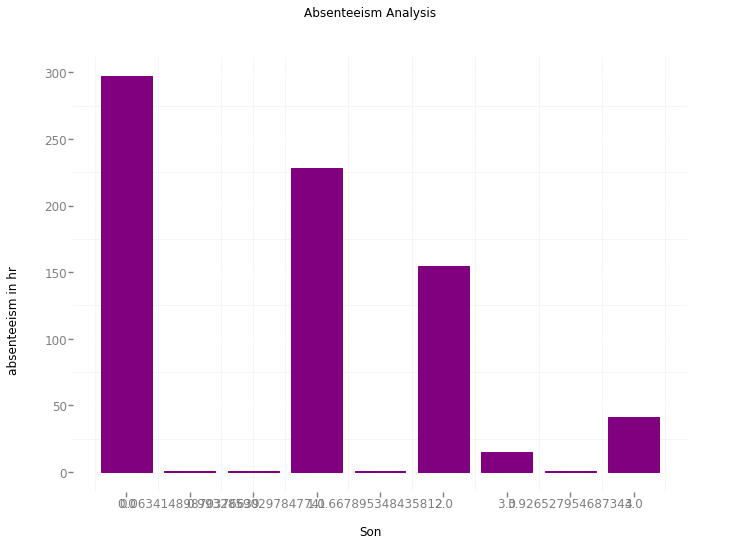

<ggplot: (124798554148)>

In [173]:
ggplot(clean_data, aes(x='Son', y='Absenteeism time in hours')) +\
    geom_bar(fill= "Purple") +\
    scale_color_brewer(type='diverging', palette=5) +\
    xlab("Son") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

In [174]:
clean_data.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Son', 'Social drinker', 'Height',
       'Body mass index', 'Absenteeism time in hours'],
      dtype='object')